<a href="https://www.kaggle.com/code/yahyasoker/steam-score-prediction-with-randomforestregressor?scriptVersionId=130720801" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [1.Preparing Data](#1)
### [2.Training Data](#2)
### [3.Predicting](#3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

<a id='1'></a>
### 1.Perparing Data

In [2]:
df = pd.read_csv("/kaggle/input/steam-releases/games-release-ALL.csv")
df.isnull().sum()

Unnamed: 0          0
game                0
link                0
release             0
peak_players        0
positive_reviews    0
negative_reviews    0
total_reviews       0
rating              0
dtype: int64

In [3]:
df.shape

(66427, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66427 entries, 0 to 66426
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        66427 non-null  int64 
 1   game              66427 non-null  object
 2   link              66427 non-null  object
 3   release           66427 non-null  object
 4   peak_players      66427 non-null  object
 5   positive_reviews  66427 non-null  object
 6   negative_reviews  66427 non-null  object
 7   total_reviews     66427 non-null  object
 8   rating            66427 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [5]:
df.describe()

,Unnamed: 0
count,66427.000000
mean,33213.000000
std,19175.967503
min,0.000000
25%,16606.500000
50%,33213.000000
75%,49819.500000
max,66426.000000


In [6]:
df.head()

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,0,Pizza Tower,/app/2231450/,Jan 26 2023,"4,529","19,807",227,227,96.39%
1,1,Resident Evil 4,/app/2050650/,Mar 24 2023,"168,191","61,752","1,616","1,616",95.75%
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,"15,543","12,643",213,213,95.54%
3,3,Pineapple on pizza,/app/2263010/,Mar 28 2023,"1,415","11,717",209,209,95.39%
4,4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,"6,132","14,152",324,324,95.09%


In [7]:
# reducing data for faster run
df_new = df[:1000]

In [8]:
# droping unnecesary data
df_new = df_new.drop('game', axis=1)
df_new = df_new.drop('Unnamed: 0', axis=1)
df_new = df_new.drop('link', axis=1)
df_new = df_new.drop('release', axis=1)

In [9]:
#Changing string to int
df_new['positive_reviews'] = df_new['positive_reviews'].str.replace(',', '').astype(float)
df_new['negative_reviews'] = df_new['negative_reviews'].str.replace(',', '').astype(float)
df_new['peak_players'] = df_new['peak_players'].str.replace(',', '').astype(float)
df_new['rating'] = df_new['rating'].str.replace('%', '').astype(float)

In [10]:
df_new.shape

(1000, 5)

In [11]:
# fixing total_reviews column
df_new['total_reviews'] = df_new['positive_reviews'] + df_new['negative_reviews']

In [12]:
df_new.head()

,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,4529.0,19807.0,227.0,20034.0,96.39
1,168191.0,61752.0,1616.0,63368.0,95.75
2,15543.0,12643.0,213.0,12856.0,95.54
3,1415.0,11717.0,209.0,11926.0,95.39
4,6132.0,14152.0,324.0,14476.0,95.09


<AxesSubplot:>

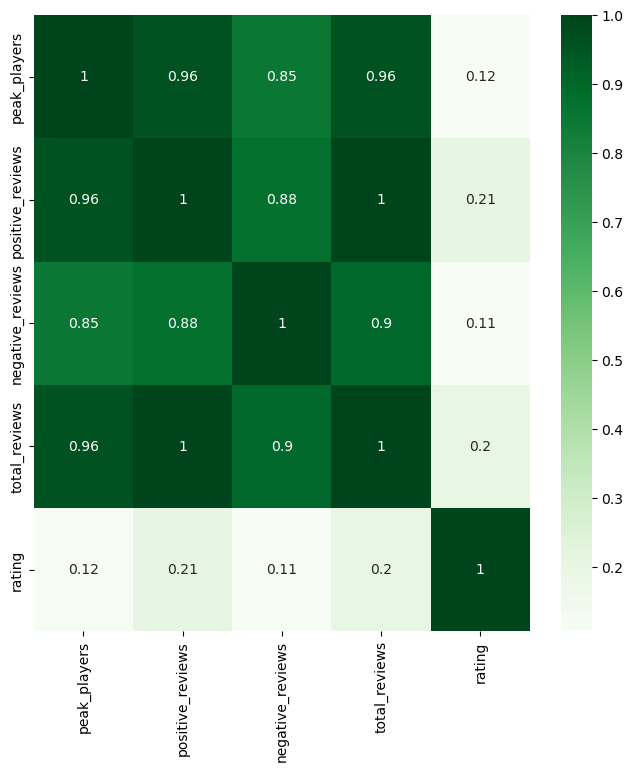

In [13]:
corr = df_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap="Greens",annot=True)

In [14]:
x = df_new.drop(['rating'],axis=1)
y = df_new['rating']

<a id='2'></a>
### 2.Training Data

In [15]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [16]:
# Train a RandomForestRegressor model on the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

<a id='3'></a>
### 3.Predicting

In [17]:
# Make predictions on the train data
training_data_pred = model.predict(x_train)
r2_train = metrics.r2_score(y_train, training_data_pred)
print(f"R squared value: {r2_train}")

R squared value: 0.9695749428026805


In [18]:
# Make predictions on the test data
test_data_pred = model.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_pred)
print(f"R squared value: {r2_test}")

R squared value: 0.799296380824628
